| 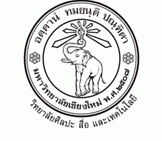 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;          |        <em><font size=5>Department of Modern Management and <br> Information Technology </font></em><br>  <font size=3>College of Arts, Media and Technology,<br> Chiang Mai University<br></font> Midterm Examination, Academic Year 2021 <br> Business Data Mining 954471
|:- |-: 
|<strong>October 18th, 2021 8:00 - 23:59 </strong>| <strong>(Total 35 Points) </strong>

<b>Name______Kittipoom____________Wongfu_________________      Student ID________622110137_____________</b>

Instructions: 

-	This exam is worth 35% of your final grade.
-	This exam consists of 5 Questions
-	Finish this exam, download it as .ipynb file and send it to my FB messenger.
-	Write your student ID as filename. 
-	Allow anything.
-	<b>Please do this exam alone and be honest to yourself. </b>
-	The time allowed students to leave the testing room after the exam is open to copy it.
-	Students who cheat in any way will be prosecuted by the CMU regulation BE 2554, which governs student behavior and describes discipline during the exam period. The proctor must report any suspected cheating to the director.
<br>

### <em>Score Sheet:</em>
|<font size=3> Question|<font size=3> Full Mark|<font size=3> Student’s Mark|
|:- |:-:|:-:
<font size=3> Q1 |<font size=3> 5|
<font size=3> Q2 |<font size=3> 5|
<font size=3> Q3 |<font size=3> 5|
<font size=3> Q4 |<font size=3> 10|
<font size=3> Q5 |<font size=3> 10|
<font size=3> Total|<font size=3> 35|








In [1]:
import numpy as np
import pandas as pd

#### Q1. Create Model to predict the Telco customer churn (Churn = Label).
<b><font color=red>The difference of Train and Test accuracy must be lower than 10% to get full score.</font></b>

In [2]:
df = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.groupby('Churn')['Churn'].count()

Churn
No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
df.groupby('SeniorCitizen')['SeniorCitizen'].count()

SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [7]:
df.groupby('MultipleLines')['MultipleLines'].count()

MultipleLines
No                  3390
No phone service     682
Yes                 2971
Name: MultipleLines, dtype: int64

In [8]:
df.groupby('InternetService')['InternetService'].count()

InternetService
DSL            2421
Fiber optic    3096
No             1526
Name: InternetService, dtype: int64

In [9]:
df.groupby('Contract')['Contract'].count()

Contract
Month-to-month    3875
One year          1473
Two year          1695
Name: Contract, dtype: int64

In [10]:
df.groupby('PaymentMethod')['PaymentMethod'].count()

PaymentMethod
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Electronic check             2365
Mailed check                 1612
Name: PaymentMethod, dtype: int64

In [11]:
df_clean_drop = df.drop(['customerID', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','PaymentMethod'],axis = 1)

In [12]:
df_clean_drop.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df_clean_drop['gender'] = pd.factorize(df_clean_drop['gender'])[0]
df_clean_drop['Partner'] = pd.factorize(df_clean_drop['Partner'])[0]
df_clean_drop['Dependents'] = pd.factorize(df_clean_drop['Dependents'])[0]
df_clean_drop['PhoneService'] = pd.factorize(df_clean_drop['PhoneService'])[0]
df_clean_drop['MultipleLines'] = pd.factorize(df_clean_drop['MultipleLines'])[0]
df_clean_drop['InternetService'] = pd.factorize(df_clean_drop['InternetService'])[0]
df_clean_drop['OnlineSecurity'] = pd.factorize(df_clean_drop['OnlineSecurity'])[0]
df_clean_drop['OnlineBackup'] = pd.factorize(df_clean_drop['OnlineBackup'])[0]
df_clean_drop['DeviceProtection'] = pd.factorize(df_clean_drop['DeviceProtection'])[0]
df_clean_drop['TechSupport'] = pd.factorize(df_clean_drop['TechSupport'])[0]
#df_clean_drop['StreamingTV'] = pd.factorize(df_clean_drop['StreamingTV'])[0]
#df_clean_drop['StreamingMovies'] = pd.factorize(df_clean_drop['StreamingMovies'])[0]
df_clean_drop['Contract'] = pd.factorize(df_clean_drop['Contract'])[0]
#df_clean_drop['PaperlessBilling'] = pd.factorize(df_clean_drop['PaperlessBilling'])[0]
#df_clean_drop['PaymentMethod'] = pd.factorize(df_clean_drop['PaymentMethod'])[0]
df_clean_drop['TotalCharges'] = pd.factorize(df_clean_drop['TotalCharges'])[0]
df_clean_drop['Churn'] = pd.factorize(df_clean_drop['Churn'])[0]

In [14]:
df_clean_drop.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
Contract              int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [15]:
df_clean_drop

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,29.85,0,0
1,1,0,1,0,34,1,1,0,1,1,1,0,1,56.95,1,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,53.85,2,1
3,1,0,1,0,45,0,0,0,1,1,1,1,1,42.30,3,0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,70.70,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,24,1,2,0,1,1,1,1,1,84.80,6526,0
7039,0,0,0,1,72,1,2,1,0,0,1,0,1,103.20,6527,0
7040,0,0,0,1,11,0,0,0,1,1,0,0,0,29.60,6528,0
7041,1,1,0,0,4,1,2,1,0,1,0,0,0,74.40,6529,1


In [16]:
df_clean_drop.groupby('Churn')['Churn'].count()

Churn
0    5174
1    1869
Name: Churn, dtype: int64

In [17]:
y = df_clean_drop['Churn'].values
X = df_clean_drop.drop(['Churn'],axis = 1).values

In [18]:
y.shape

(7043,)

In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X, y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm =  scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [10,50,100,200,500],}
clf = GridSearchCV(ExtraTreesClassifier(random_state=0),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best params : {'n_estimators': 200}
10CV accuracy : 77.67908351810792


In [24]:
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

Test accuracy : 77.50177430801988


#### Q2. Create Model to predict the spam mail utilizing feature selection method. (Column 0 = Label)
<b><font color=red>The difference of Train and Test accuracy must be lower than 10% to get full score.</font></b>

In [25]:
df = pd.read_csv("../input/plenoi-mail/MAIL.csv", header = None)
df_test = pd.read_csv("../input/plenoi-mail/MAIL_test.csv", header = None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0,-1.0,-1.000000,-0.792705,-1.000000,-1.000000,-1.000000,-0.421965,-1.00000,-1.000000,...,-1.0,-1.0,-0.088486,-1.000000,-0.903030,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
1,0,-1.0,-0.941068,-0.735823,-0.791284,-0.833604,-0.882136,-1.000000,-0.73849,-0.865562,...,-1.0,-1.0,-0.859439,-0.970093,-0.970093,-0.574766,-0.715888,-0.891589,-0.837383,-1.0
2,0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-1.0,-1.0,-0.703353,-1.000000,-0.936884,-0.461539,-0.850098,-0.771204,-1.000000,-1.0
3,0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-1.0,-1.0,-0.729497,-0.884892,-0.769784,-1.000000,-0.453238,-0.582735,-1.000000,-1.0
4,0,-1.0,-1.000000,-0.728317,-1.000000,-0.315508,-0.515152,-1.000000,-1.00000,-1.000000,...,-1.0,-1.0,-0.090325,-1.000000,-0.741936,-1.000000,0.225804,-1.000000,-1.000000,-1.0


In [26]:
df

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-0.148221,-1.000000,-1.000000,-1.000000,-0.754045,-1.000000,-0.718446,-1.0
1,0,-1.000000,-1.000000,-1.000000,-1.0,-0.826910,-0.632182,-1.000000,-1.000000,-0.720307,...,-1.0,-1.0,-0.554151,-1.000000,-0.936759,-0.640316,-1.000000,-0.312254,-1.000000,-1.0
2,0,-1.000000,-0.840000,-0.820690,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-0.635001,...,-1.0,-1.0,-0.608332,-0.916667,-1.000000,-0.763021,-1.000000,-1.000000,-1.000000,-1.0
3,0,-1.000000,-1.000000,-0.886152,-1.0,-1.000000,-0.796825,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-0.387624,-1.000000,-0.895765,-0.703583,-1.000000,-0.811075,-0.716612,-1.0
4,0,-1.000000,-1.000000,-0.774452,-1.0,-1.000000,-0.798742,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-1.000000,-0.894040,-0.894040,-1.000000,-0.496689,-1.000000,-1.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,1,-1.000000,-1.000000,-0.825912,-1.0,-0.780697,-1.000000,-0.514563,-0.310679,-1.000000,...,-1.0,-1.0,-0.810101,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
3583,1,-0.718147,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-0.400795,-1.000000,-0.872510,-0.818725,-1.000000,-1.000000,-0.306773,-1.0
3584,1,-1.000000,-0.854546,-1.000000,-1.0,0.026740,-0.854546,-1.000000,-1.000000,-0.668183,...,-1.0,-1.0,-0.645283,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.589623,-1.0
3585,1,-1.000000,-0.706422,-1.000000,-1.0,-1.000000,-0.706422,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-1.000000,-1.000000,-0.841584,-0.549505,-0.247525,-1.000000,-1.000000,-1.0


In [27]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0,-1.000000,-1.000000,-0.792705,-1.000000,-1.000000,-1.000000,-0.421965,-1.00000,-1.000000,...,-1.0,-1.0,-0.088486,-1.000000,-0.903030,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
1,0,-1.000000,-0.941068,-0.735823,-0.791284,-0.833604,-0.882136,-1.000000,-0.73849,-0.865562,...,-1.0,-1.0,-0.859439,-0.970093,-0.970093,-0.574766,-0.715888,-0.891589,-0.837383,-1.0
2,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-1.0,-1.0,-0.703353,-1.000000,-0.936884,-0.461539,-0.850098,-0.771204,-1.000000,-1.0
3,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-1.0,-1.0,-0.729497,-0.884892,-0.769784,-1.000000,-0.453238,-0.582735,-1.000000,-1.0
4,0,-1.000000,-1.000000,-0.728317,-1.000000,-0.315508,-0.515152,-1.000000,-1.00000,-1.000000,...,-1.0,-1.0,-0.090325,-1.000000,-0.741936,-1.000000,0.225804,-1.000000,-1.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,1,-0.601094,-0.912568,-1.000000,-1.000000,-0.876567,-1.000000,-1.000000,-1.00000,-1.000000,...,-1.0,-1.0,-0.579888,-0.910615,-0.955307,-0.872905,-1.000000,-1.000000,-0.513967,-1.0
3579,1,-1.000000,-0.802469,-1.000000,-1.000000,-0.860566,-1.000000,-1.000000,-1.00000,-1.000000,...,-1.0,-1.0,-0.643038,-0.949367,-1.000000,-0.712025,-1.000000,-1.000000,-1.000000,-1.0
3580,1,-1.000000,-0.892618,-0.879658,-1.000000,-0.848401,-0.892618,-0.664430,-1.00000,-1.000000,...,-1.0,-1.0,-0.740690,-1.000000,-1.000000,-0.529311,-0.213796,-0.400002,-1.000000,-1.0
3581,1,-1.000000,-0.959647,-0.954777,-0.714166,-0.658186,-0.717528,-1.000000,-1.00000,-0.907945,...,-1.0,-1.0,-1.000000,-1.000000,-0.898089,-0.884076,-1.000000,-1.000000,-0.889172,-1.0


In [28]:
df_clean = df

In [29]:
df_clean.dtypes


0        int64
1      float64
2      float64
3      float64
4      float64
        ...   
396    float64
397    float64
398    float64
399    float64
400    float64
Length: 401, dtype: object

In [30]:
df_test.dtypes

0        int64
1      float64
2      float64
3      float64
4      float64
        ...   
396    float64
397    float64
398    float64
399    float64
400    float64
Length: 401, dtype: object

In [31]:
df_clean.shape

(3587, 401)

In [32]:
df_test.shape

(3583, 401)

In [33]:
y = df[0].values 
X = df.drop([0],axis = 1).values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [35]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
scl.fit(X_res)
X_train_norm = scl.transform(X_res)
X_test_norm = scl.transform(X_test)


In [37]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

sm = SMOTE(random_state=1)
X_train, y_train = sm.fit_resample(X_train, y_train)
clf = Pipeline([
  ('scaler', scl),
  ('feature_selection', SelectKBest(f_classif)),  
  ('classification', ExtraTreesClassifier(random_state=0))
])

In [38]:
params = {
    'feature_selection__k' : [3, 5, 7],
    'classification__n_estimators' : [10,20,50,100,200],
    'classification__max_depth' : [3, 5, 7]
}
best_clf = GridSearchCV(clf, params, cv=10)
best_clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classification',
                                        ExtraTreesClassifier(random_state=0))]),
             param_grid={'classification__max_depth': [3, 5, 7],
                         'classification__n_estimators': [10, 20, 50, 100, 200],
                         'feature_selection__k': [3, 5, 7]})

In [39]:
print("10CV Training Accuracy : "+str(best_clf.best_score_))

10CV Training Accuracy : 0.6579606331168831


In [40]:
y_predict = best_clf.predict(X_test)
sum(y_predict == y_test)/len(y_test)

0.6796657381615598

### Q3. Create Deep Learning Model to predict the quality of wine. Our model will focus only on wine with quality of 5, 6, 7 (quality = label)
<b><font color=red>The difference of Train and Test accuracy must be lower than 10% to get full score.</font></b>

In [41]:
df = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
df.shape

(1599, 12)

In [43]:
df.groupby("quality")["quality"].count()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [44]:
df_clean = df

In [45]:
df_clean = df_clean.drop(df_clean[df_clean.quality<5].index)
df_clean = df_clean.drop(df_clean[df_clean.quality>7].index)

In [46]:
df_clean['quality'].unique()

array([5, 6, 7])

In [47]:
df_clean.shape

(1518, 12)

In [48]:
Xo = df_clean.drop(['quality'],axis=1).values
yo = df_clean['quality'].values

In [49]:
yo[yo==5] = 0
yo[yo==6] = 1
yo[yo==7] = 2

In [50]:
[sum(yo == item) for item in np.unique(yo)]

[681, 638, 199]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y, yt = train_test_split(Xo, yo, test_size=0.2, random_state=0)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_val, y, yv = train_test_split(X_train, y, test_size=0.2, random_state=0)

In [53]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y)

In [54]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
scl.fit(X_res)
X_train_norm = scl.transform(X_res)
X_val_norm = scl.transform(X_val)
X_test_norm = scl.transform(X_test)
y = y_res

In [55]:
num_label = len(np.unique(y)) 
y_multi = (np.arange(num_label) == y[:,None]).astype(np.float32)
yv_multi = (np.arange(num_label) == yv[:,None]).astype(np.float32)
yt_multi = (np.arange(num_label) == yt[:,None]).astype(np.float32)

In [56]:
sample_size, input_size = X_train_norm.shape

In [57]:
import tensorflow as tf
def create_model(input_size, num_label):
    tf.random.set_seed(0)
    tf.compat.v1.reset_default_graph() # Clear Model
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(16, activation='relu', input_shape=(input_size,)),
      tf.keras.layers.Dense(8, activation='relu'),
      tf.keras.layers.Dense(2, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(num_label, activation='softmax')    
    ])
    return model

2021-10-18 13:18:33.632886: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-18 13:18:33.632996: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [58]:
model = create_model(input_size, num_label)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_acc = list()
val_acc = list()
for i in range(0,200):
  history = model.fit(X_train_norm, y_multi, epochs= 1, batch_size = int(sample_size/6), validation_data= (X_val, yv_multi))
  tmp_avg = np.mean(history.history['loss'])
  tmp_avg_val = np.mean(history.history['val_loss'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)

2021-10-18 13:18:38.476802: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-18 13:18:38.479713: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-18 13:18:38.479749: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-18 13:18:38.479773: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (9b235a8f3f3f): /proc/driver/nvidia/version does not exist
2021-10-18 13:18:38.480749: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

7/7 [==============================] - 0s 21ms/step - loss: 0.8575 - accuracy: 0.5907 - val_loss: 67.5134 - val_accuracy: 0.5062


In [59]:
yp = model.predict(X_test_norm)
yp = np.argmax(yp, 1)
sum(yp == yt)/len(yt)

0.5723684210526315

#### Q4. From this food images ("../input/food41/images"), please create an image classifier to classify 2 types of food choosing by yourself. (Show me the accuracy of each type of food) 
<b><font color=red>Both types of food must be more than 50% to get full score.</font></b>

#### Q5. Create an object detection model to detect your own face in the picture. (Show me that the model can detect your face in a test image.)
<b><font color=red>The model must be able to detect your face to get full score.</font></b>